In [2]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import glob
#read all file
all_file_path=glob.glob('/kaggle/input/datverse/*.edf')
print(len(all_file_path))

28


In [4]:
healthy_file_path = [i for i in all_file_path if 'h' in i.split('/')[4]]
patient_file_path = [i for i in all_file_path if 's' in i.split('/')[4]]
print(len(healthy_file_path)),print(len(patient_file_path))  # Assuming epochs_array contains arrays that can be stacked vertically

14
14


(None, None)

Extracting EDF parameters from /kaggle/input/datverse/s10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 212499  =      0.000 ...   849.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp2, F8, T4, T6, O2, Fp1, F7, T3, T5, O1, F4, C4, P4, F3, C3, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2003-03-11 12:08:50 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 1 item (dict)
>
['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
[[2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 ...
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]
 [2.5e-09 2.5e-09 2.5e-09 ... 2.5e-09 2.5e-09 2.5e-09]]
[0.00000e+00 4.00000e-03 8.00000e-03 ... 8.49

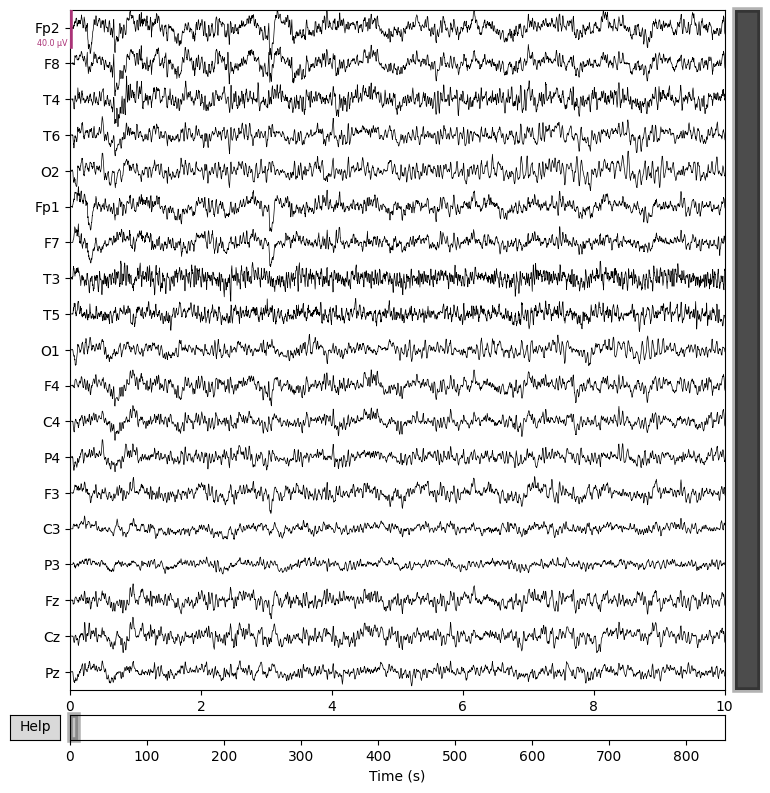

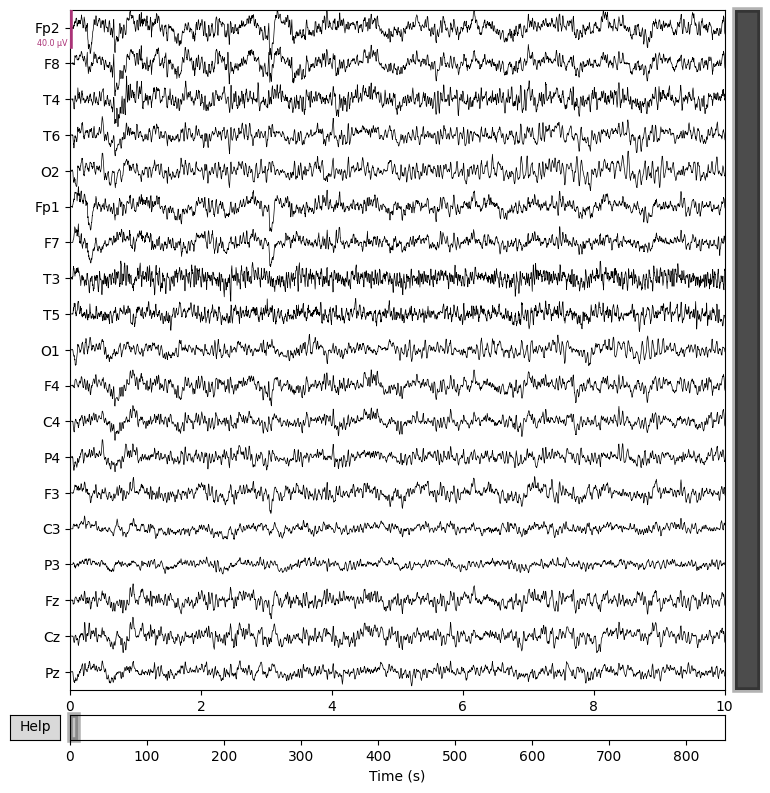

In [5]:
import mne

# Load the EDF file
file_path = "/kaggle/input/datverse/s10.edf"
raw = mne.io.read_raw_edf(file_path, preload=True)

# Basic information
print(raw.info)  # Display metadata
print(raw.ch_names)  # List channel names

# Access data
data, times = raw[:]
print(data)  # The signal data
print(times)  # Time information

# Plot the data (optional)
raw.plot()

In [6]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [7]:
data=read_data(healthy_file_path[0])

Extracting EDF parameters from /kaggle/input/datverse/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


In [8]:
%%capture
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

In [9]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [10]:
epochs_array=control_epochs_array+patients_epochs_array
epochs_labels=control_epochs_labels+patients_epochs_labels
print(len(epochs_array),len(epochs_labels))


28 28


In [11]:
groups=[[i]*len(j) for i, j in enumerate(epochs_array)]
len(groups)

28

In [12]:
epochs_array = np.vstack(epochs_array)  # Assuming epochs_array contains arrays that can be stacked vertically
epochs_labels = np.hstack(epochs_labels)  # Convert to NumPy array
groups_array = np.hstack(groups)  # Convert to NumPy array

# Now you can safely check the shapes
#no. of segments,no. of channels,length of signal
print(epochs_array.shape, epochs_labels.shape, groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [13]:
print(epochs_array.shape,epochs_labels.shape,groups_array.shape)

(1142, 19, 6250) (1142,) (1142,)


In [14]:
from scipy import stats

import numpy as np
from tqdm import tqdm  # Use tqdm instead of tqdm_notebook

# Define feature functions
def mean(data):
    return np.mean(data, axis=-1)

def std(data):
    return np.std(data, axis=-1)

def ptp(data):
    return np.ptp(data, axis=-1)

def var(data):
    return np.var(data, axis=-1)

def minim(data):
    return np.min(data, axis=-1)

def maxim(data):
    return np.max(data, axis=-1)

def argminim(data):
    return np.argmin(data, axis=-1).astype(float)  # Convert to float for consistent shape

def argmaxim(data):
    return np.argmax(data, axis=-1).astype(float)  # Convert to float for consistent shape

def mean_square(data):
    return np.mean(data**2, axis=-1)

def rms(data):
    return np.sqrt(np.mean(data**2, axis=-1))

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data, axis=-1)), axis=-1)

def skewness(data):
    return stats.skew(data, axis=-1)

def kurtosis(data):
    return stats.kurtosis(data, axis=-1)

# Concatenate features while ensuring each feature is calculated for each channel
def concatenate_features(data):
    # Stack each feature along the last axis for each channel
    return np.stack((
        mean(data),
        std(data),
        ptp(data),
        var(data),
        minim(data),
        maxim(data),
        argminim(data),
        argmaxim(data),
        mean_square(data),
        rms(data),
        abs_diffs_signal(data),
        skewness(data),
        kurtosis(data)
    ), axis=-1)  # Stack along the last axis to get 13 features per channel

# Process each epoch to create features array with shape (1142, 19, 13)
features = []
for data in tqdm(epochs_array):  # Replace tqdm_notebook with tqdm
    features.append(concatenate_features(data))

features = np.array(features)  # Expected shape: (1142, 19, 13)
print(features.shape)  # Should output (1142, 19, 13)


100%|██████████| 1142/1142 [00:08<00:00, 131.50it/s]

(1142, 19, 13)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap

# Flatten the features from (1142, 19, 13) to (1142, 247) for the model
X = features.reshape(features.shape[0], -1)
y = epochs_labels  # Assuming epochs_labels is already defined with shape (1142,)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.93


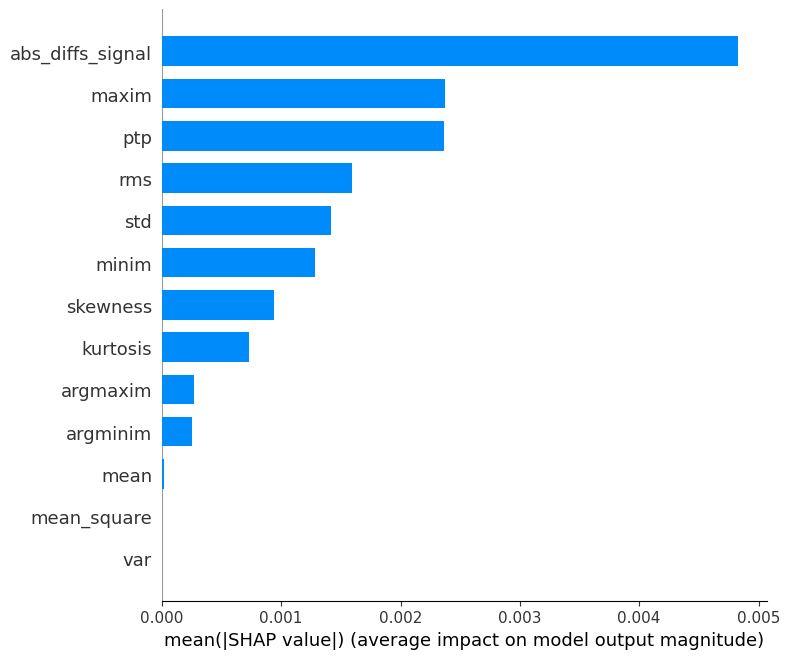

In [16]:
shap.initjs()
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Reshape SHAP values back to (test_samples, 19, 13) for interpretability
shap_values_reshaped = shap_values[1].reshape(-1, 19, 13)

shap.summary_plot(shap_values_reshaped.mean(axis=1),  
                  feature_names=["mean", "std", "ptp", "var", "minim", "maxim", 
                                 "argminim", "argmaxim", "mean_square", "rms", 
                                 "abs_diffs_signal", "skewness", "kurtosis"],
                  plot_type="bar")

In [17]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
import pandas as pd

# Define statistical feature names (ignoring channel-specific importance)
statistical_features = [
    "Mean", "Std Dev", "Peak-to-Peak", "Variance", "Min", "Max",
    "Argmin", "Argmax", "Mean Square", "RMS", "Abs Diff Signal", "Skewness", "Kurtosis"
]

# Flatten the feature array for model input
X = features.reshape(features.shape[0], -1)

# Compute permutation importance
perm = PermutationImportance(rf_model, random_state=42).fit(X_test, y_test)

# Extract feature importances
feature_importances = perm.feature_importances_

# Reshape back to (num_channels, num_stats) to sum over channels
num_channels = features.shape[1]  # 19 channels
num_stats = features.shape[2]  # 13 statistical features
reshaped_importance = feature_importances.reshape(num_channels, num_stats)

# Aggregate feature importance across channels (sum or mean)
stat_feature_importance = np.mean(reshaped_importance, axis=0)  # Taking mean across channels

# Convert to DataFrame for readability
importance_df = pd.DataFrame({
    "Feature": statistical_features,
    "Importance": stat_feature_importance
}).sort_values(by="Importance", ascending=False)

# Print the feature importance ranked by statistical feature
print(importance_df)


            Feature  Importance
10  Abs Diff Signal    0.001473
11         Skewness    0.000706
1           Std Dev    0.000675
9               RMS    0.000675
6            Argmin    0.000246
0              Mean    0.000000
3          Variance    0.000000
8       Mean Square    0.000000
2      Peak-to-Peak   -0.000031
4               Min   -0.000031
12         Kurtosis   -0.000061
5               Max   -0.000123
7            Argmax   -0.000246


In [18]:
!pip install lime


In [19]:
import lime
import lime.lime_tabular
import numpy as np

# Aggregate over channels: Compute mean across channels (axis=1), keeping only statistical features
X_statistical = features.mean(axis=1)  # Shape: (samples, 13) → Features aggregated across channels
y = epochs_labels  # Labels: 0 (Healthy) or 1 (Schizophrenic)

# Splitting into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_statistical, y, test_size=0.3, random_state=42)

# Train a RandomForest model on the statistical features
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Define feature names for statistical features
statistical_feature_names = [
    "Mean", "Std Dev", "Peak-to-Peak", "Variance", "Min", "Max", "Argmin", "Argmax", 
    "Mean Square", "RMS", "Abs Diff", "Skewness", "Kurtosis"
]

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,  
    mode="classification",
    feature_names=statistical_feature_names,  # Statistical feature names only
    class_names=["Healthy", "Schizophrenic"],
    discretize_continuous=True
)

# Pick an instance to explain
idx = 10  # Example index from test set
instance = X_test[idx]

# Generate explanation
exp = explainer.explain_instance(instance, rf_model.predict_proba, num_features=5)

# Show the explanation
exp.show_in_notebook()




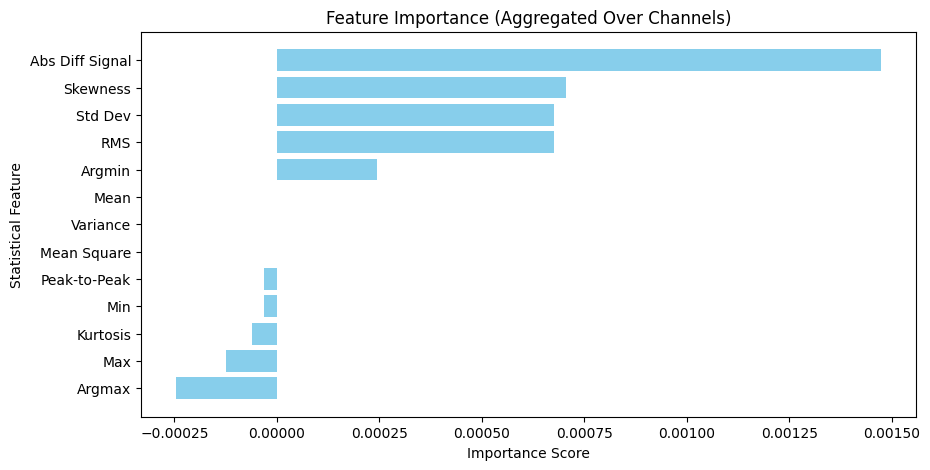

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Statistical Feature")
plt.title("Feature Importance (Aggregated Over Channels)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


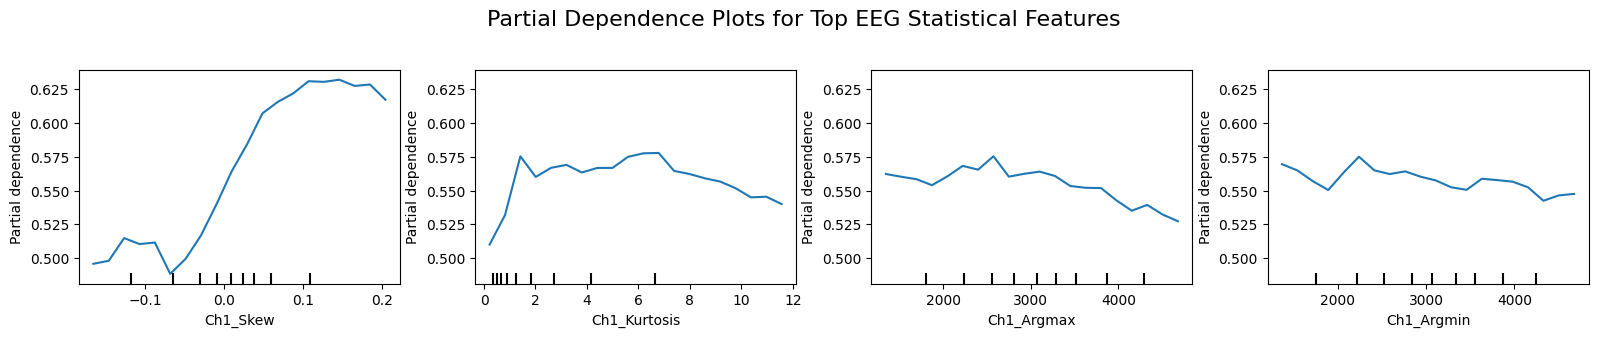

In [21]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import numpy as np

# Original feature names per channel
feature_names = ["Mean", "Std", "PTP", "Var", "Min", "Max", 
                 "Argmin", "Argmax", "MeanSq", "RMS", "AbsDiffs", "Skew", "Kurtosis"]

# Step 1: Generate flat feature names assuming 19 EEG channels
n_channels = 19
flat_feature_names = [f"Ch{ch+1}_{stat}" for ch in range(n_channels) for stat in feature_names]

# Step 2: Filter low-variance features
selector = VarianceThreshold(threshold=1e-4)
selector.fit(X_train)
high_var_indices = selector.get_support(indices=True)

# Step 3: Select top-N high variance features (e.g., top 12)
variances = selector.variances_[high_var_indices]
top_k = 12
top_k_indices = np.argsort(variances)[-top_k:]  # indices within high_var_indices
selected_indices = high_var_indices[top_k_indices]
selected_feature_names = [flat_feature_names[i] for i in selected_indices]

# Step 4: PDP Plotting
ncols = 4
nrows = int(np.ceil(len(selected_indices) / ncols))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 3.5 * nrows))
ax = ax.flatten()

PartialDependenceDisplay.from_estimator(
    rf_model,                      # your trained model
    X_train,                       # input features
    features=selected_indices,    # top variable features
    feature_names=flat_feature_names,
    grid_resolution=20,
    ax=ax[:len(selected_indices)]
)

# Step 5: Final formatting
for unused_ax in ax[len(selected_indices):]:
    unused_ax.set_visible(False)

plt.suptitle("Partial Dependence Plots for Top EEG Statistical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
